✅ Dataset loaded: ../data/benin-malanville.csv, Shape: (525600, 20)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-nul

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Month,GHI_z
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,...,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0,525600.000000,5.256000e+05
mean,2022-02-07 12:00:30.000000512,240.342811,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,...,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN,6.526027,-6.056376e-17
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,...,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN,1.000000,-7.654356e-01
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,...,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN,4.000000,-7.325181e-01
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,...,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN,7.000000,-7.210423e-01
75%,2022-05-09 18:00:15,482.900000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,...,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN,10.000000,7.333670e-01
max,2022-08-09 00:00:00,1233.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,...,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN,12.000000,3.540715e+00
std,NaN,330.868308,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,...,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN,3.447855,1.000001e+00


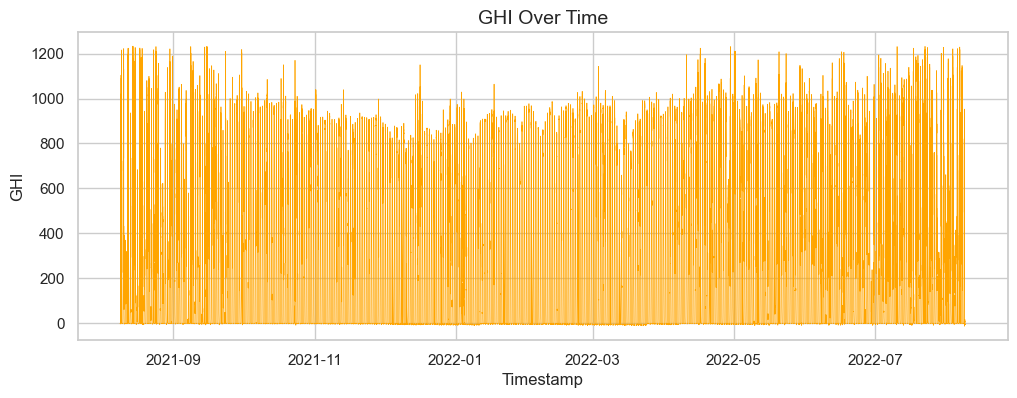

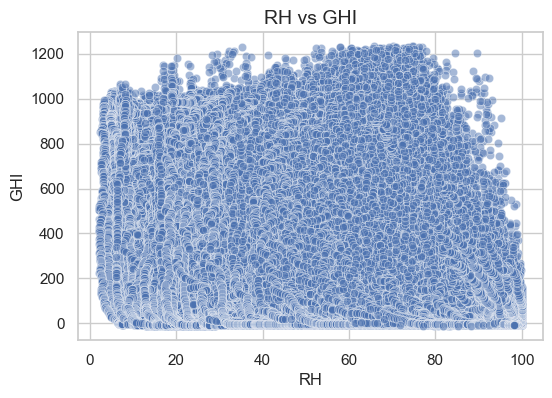

c:\Users\hp\Documents\GitHub\solar-challenge-week0\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


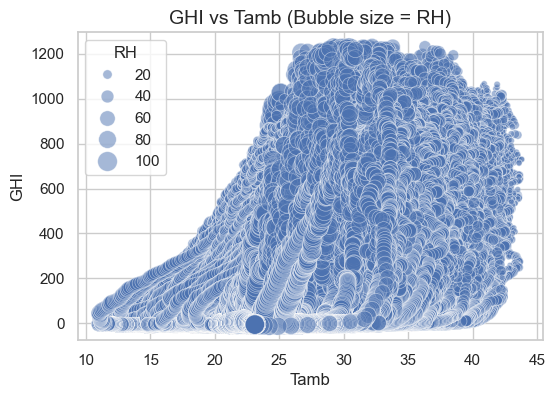

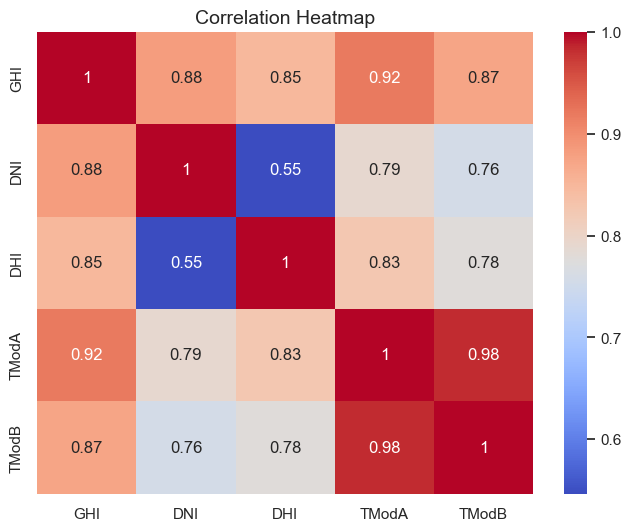

✅ Cleaned dataset saved to: ../data/benin_clean.csv


In [3]:
# Benin Solar Data -  EDA

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Display plots inline
%matplotlib inline

# -----------------------------
# 1️⃣ Load Dataset
# -----------------------------
file_path = '../data/benin-malanville.csv'
df = pd.read_csv(file_path)
print(f"✅ Dataset loaded: {file_path}, Shape: {df.shape}")

# -----------------------------
# 2️⃣ Basic Info & Missing Values
# -----------------------------
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values per Column ---")
print(df.isna().sum())

# -----------------------------
# 3️⃣ Feature Engineering
# -----------------------------
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Extract month for temporal analysis
df['Month'] = df['Timestamp'].dt.month

# -----------------------------
# 4️⃣ Outlier Detection
# -----------------------------
df['GHI_z'] = zscore(df['GHI'])
outliers = df[df['GHI_z'].abs() > 3]
print(f"\n🚨 Potential GHI outliers: {len(outliers)}")

# Optionally, impute GHI outliers with median
df.loc[df['GHI_z'].abs() > 3, 'GHI'] = df['GHI'].median()

# -----------------------------
# 5️⃣ Summary Statistics
# -----------------------------
print("\n--- Summary Statistics ---")
display(df.describe())

# -----------------------------
# 6️⃣ Visualizations
# -----------------------------
plt.figure(figsize=(12,4))
plt.plot(df['Timestamp'], df['GHI'], color='orange', lw=0.5)
plt.title("GHI Over Time")
plt.xlabel("Timestamp")
plt.ylabel("GHI")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='RH', y='GHI', data=df, alpha=0.5)
plt.title("RH vs GHI")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x='Tamb', y='GHI', size='RH', sizes=(10,200), alpha=0.5, data=df)
plt.title("GHI vs Tamb (Bubble size = RH)")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[['GHI','DNI','DHI','TModA','TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# 7️⃣ Save Cleaned Dataset
# -----------------------------
clean_path = '../data/benin_clean.csv'
df.to_csv(clean_path, index=False)
print(f"✅ Cleaned dataset saved to: {clean_path}")
